# Missing Values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv('train_main.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# LotFrontage

<Axes: xlabel='MSSubClass'>

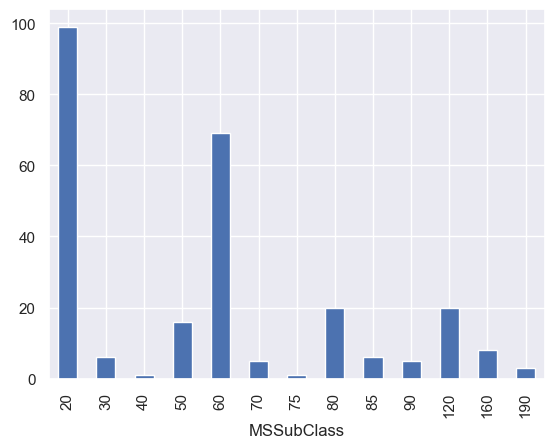

In [3]:
# checking distribution of type of houses in MSSubClass where LotFrontage is null
df[df['LotFrontage'].isna()]['MSSubClass'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='MSZoning'>

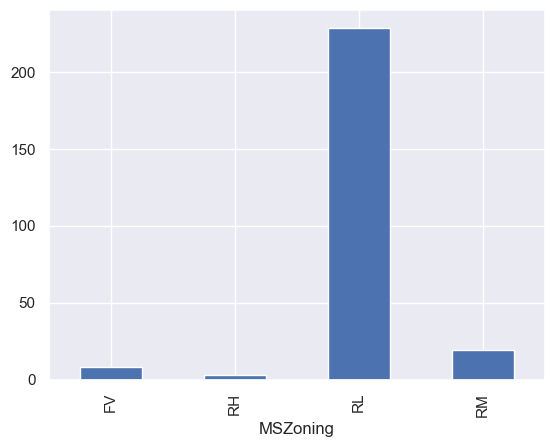

In [4]:
# checking distribution of type of houses in MSZoning where LotFrontage is null
df[df['LotFrontage'].isna()]['MSZoning'].value_counts().sort_index().plot(kind='bar')

## Checking correlation of a column LotFrontage with other columns


<Axes: >

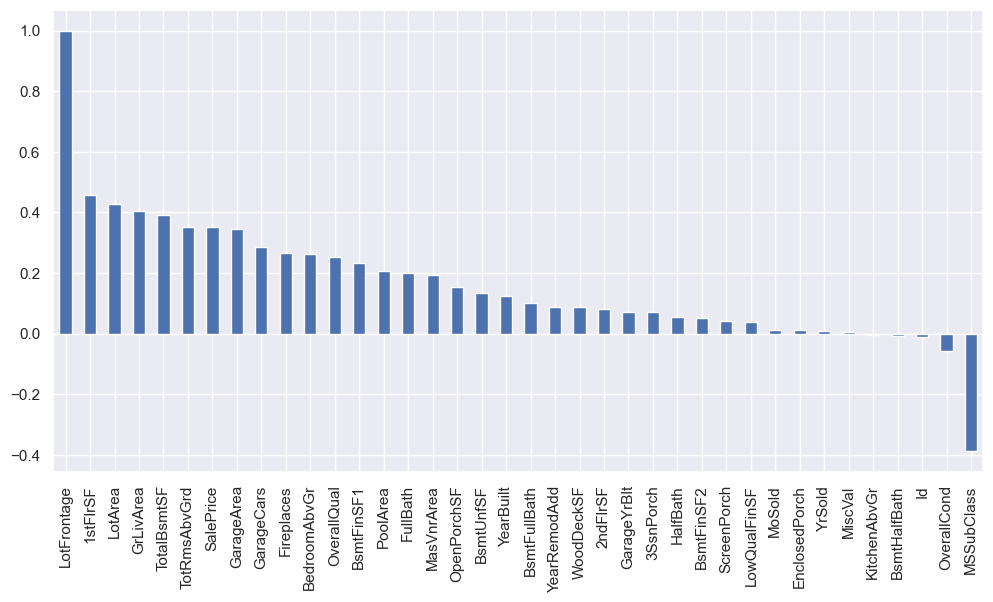

In [6]:
# relationship with numeric variables
df_numeric = df.select_dtypes(include=['number'])
df_numeric.corr()['LotFrontage'].sort_values(ascending=False).plot(kind='bar',figsize=(12,6))

In [7]:
df_numeric.corr()['LotFrontage'].sort_values(ascending=False)

LotFrontage      1.000000
1stFlrSF         0.457181
LotArea          0.426095
GrLivArea        0.402797
TotalBsmtSF      0.392075
TotRmsAbvGrd     0.352096
SalePrice        0.351799
GarageArea       0.344997
GarageCars       0.285691
Fireplaces       0.266639
BedroomAbvGr     0.263170
OverallQual      0.251646
BsmtFinSF1       0.233633
PoolArea         0.206167
FullBath         0.198769
MasVnrArea       0.193458
OpenPorchSF      0.151972
BsmtUnfSF        0.132644
YearBuilt        0.123349
BsmtFullBath     0.100949
YearRemodAdd     0.088866
WoodDeckSF       0.088521
2ndFlrSF         0.080177
GarageYrBlt      0.070250
3SsnPorch        0.070029
HalfBath         0.053532
BsmtFinSF2       0.049900
ScreenPorch      0.041383
LowQualFinSF     0.038469
MoSold           0.011200
EnclosedPorch    0.010700
YrSold           0.007450
MiscVal          0.003368
KitchenAbvGr    -0.006069
BsmtHalfBath    -0.007234
Id              -0.010601
OverallCond     -0.059213
MSSubClass      -0.386347
Name: LotFro

## Seeing the relationship between top 2 ['LotFrontage','1stFlrSF'] for choosing between spearman and pearson type of relations  

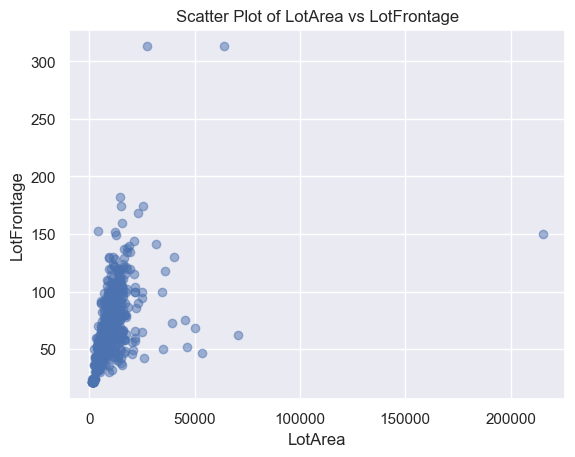

In [8]:
import matplotlib.pyplot as plt

plt.scatter(df['LotArea'], df['LotFrontage'], alpha=0.5)
plt.xlabel('LotArea')
plt.ylabel('LotFrontage')
plt.title('Scatter Plot of LotArea vs LotFrontage')
plt.show()

### removing outliers to see better
via Interquartile method

In [9]:
# Calculate IQR
Q1 = df['LotFrontage'].quantile(0.25)
Q3 = df['LotFrontage'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
no_outliers = df[(df['LotFrontage'] > lower_bound) & (df['LotFrontage'] < upper_bound)]


In [10]:
no_outliers

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


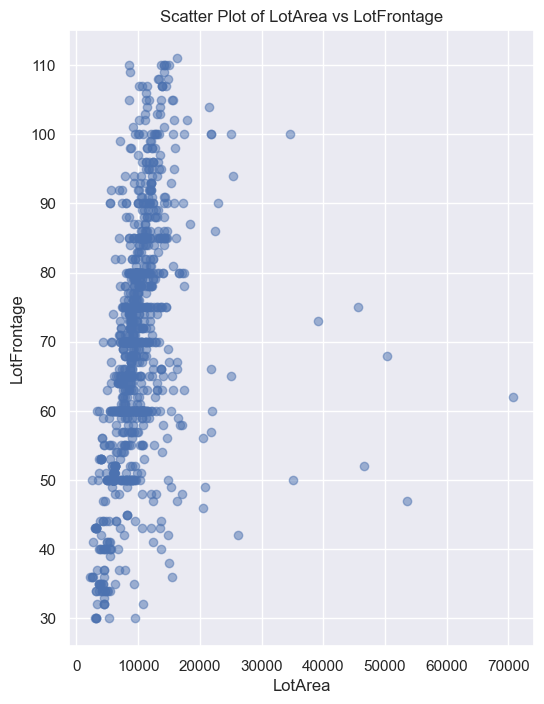

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,8))
plt.scatter(no_outliers['LotArea'], no_outliers['LotFrontage'], alpha=0.5)
plt.xlabel('LotArea')
plt.ylabel('LotFrontage')
plt.title('Scatter Plot of LotArea vs LotFrontage')
plt.show()

as it shown the relationship is linear

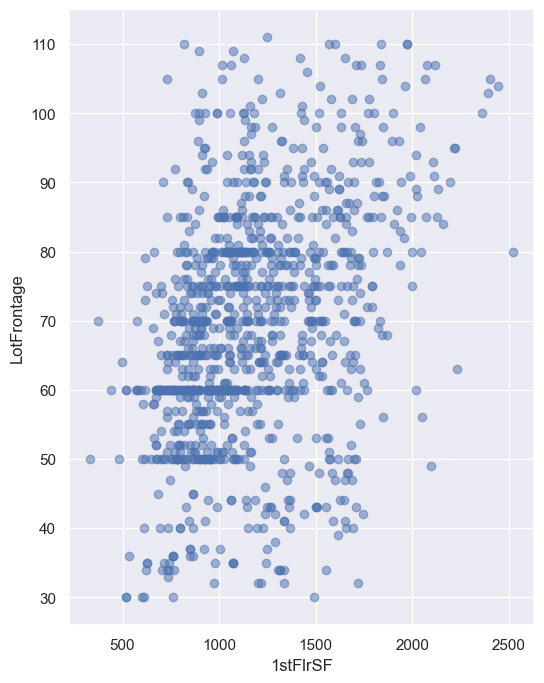

In [12]:
plt.figure(figsize=(6,8))
plt.scatter(no_outliers['1stFlrSF'],no_outliers['LotFrontage'],alpha=0.5)
plt.xlabel('1stFlrSF')
plt.ylabel('LotFrontage')
plt.show()

it isn't linear relationship but it is weekly monotonic relationship 

### Conclusion: compare spearman for 1stFlrSF and pearson for LotArea

In [14]:
df[['LotFrontage','1stFlrSF']].corr(method='spearman')

,LotFrontage,1stFlrSF
LotFrontage,1.000000,0.427678
1stFlrSF,0.427678,1.000000


In [15]:
df[['LotFrontage','LotArea']].corr()

,LotFrontage,LotArea
LotFrontage,1.000000,0.426095
LotArea,0.426095,1.000000


# so we fill missing values via 1stFlrSF

In [16]:
df[df['LotFrontage'].isna()]['1stFlrSF'].info()

<class 'pandas.core.series.Series'>
Index: 259 entries, 7 to 1446
Series name: 1stFlrSF
Non-Null Count  Dtype
--------------  -----
259 non-null    int64
dtypes: int64(1)
memory usage: 4.0 KB


In [17]:
# no_outliers = no_outliers.copy()
no_outliers['Ratio']=no_outliers['LotFrontage']/no_outliers['1stFlrSF']
average_ratio=no_outliers['Ratio'].mean()
df.loc[df['LotFrontage'].isna(),'LotFrontage']=df['1stFlrSF']*average_ratio

In [18]:
df['LotFrontage'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LotFrontage
Non-Null Count  Dtype  
--------------  -----  
1460 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [19]:
df.to_csv('nm_LotFrontage.csv')